In [1]:
import os
import pandas as pd
import numpy as np
import mygene
import gseapy as gp
import gseapy.plot as gseaplot

from gseapy import enrichment_map
import networkx as nx

%matplotlib inline
%config InlineBackend.figure_format='retina' 
%load_ext autoreload
%autoreload 2
import csv
import numpy as np
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

from gseapy.plot import barplot, dotplot

In [2]:
def get_top_ranked_genes(DEG, state):
    '''
    This function takes a DEG file path and number of genes as input and returns a list of top-ranked genes 
    with their ranks based on the DEG file.
    '''
    # Read the DEG file and calculate rank
    Calu3_12h_DEGs = pd.read_csv(DEG, sep=',')
    
    if state == 'up':
        Calu3_12h_DEGs = Calu3_12h_DEGs[(Calu3_12h_DEGs['log2FoldChange'] > 0.5) & (Calu3_12h_DEGs['padj'] < 0.05)]
    if state == 'down':
        Calu3_12h_DEGs = Calu3_12h_DEGs[(Calu3_12h_DEGs['log2FoldChange'] < -0.5) & (Calu3_12h_DEGs['padj'] < 0.05)]
        
    Calu3_12h_DEGs['Rank'] = -np.log10(Calu3_12h_DEGs.padj)*Calu3_12h_DEGs.log2FoldChange
    
    Calu3_12h_DEGs = Calu3_12h_DEGs.sort_values('Rank', ascending=False).reset_index(drop=True)
    ranking = Calu3_12h_DEGs[['Unnamed: 0', 'Rank']]

    # Annotate gene symbols using mygene package
    mg = mygene.MyGeneInfo()
    geneSyms = mg.querymany(ranking['Unnamed: 0'], scopes='ensembl.gene')
    
    df = pd.DataFrame(geneSyms)  # Convert annotation of genes into readable format
    df = df.dropna(subset=['symbol'])  # Drop rows with unexpected gene symbol
    ranking['symbol'] = df['symbol']

    # Filter out any remaining rows with NaNs
    ranking = ranking.dropna(subset=['symbol'])
    # Return the top-ranked genes based on the input num_genes
    return  ranking[['symbol','Rank']]

In [23]:
def enrich_genes(top_ranked_genes):

    enr_Reactome = gp.enrichr(gene_list=top_ranked_genes,
                                 gene_sets=['Reactome_2022'],
                                 organism='Human', cutoff=0.025)
                                 #cutoff=0.25)
    
    enr_GOBP = gp.enrichr(gene_list=top_ranked_genes,
                             gene_sets=['GO_Biological_Process_2021'],
                             organism='Human')
                             #cutoff=0.25)
    
    enr_GOMF = gp.enrichr(gene_list=top_ranked_genes ,
                             gene_sets=['GO_Molecular_Function_2021'],
                             organism='Human')
                             #cutoff=0.25)
    
    
    # Write results to CSV files
    #file_name = os.path.basename(file_path).split('.')[0]
    #enr_Reactome_up.results.to_csv(f'{file_name}_enr_Reactome.csv')
    
    return enr_Reactome, enr_GOBP, enr_GOMF

In [24]:
DEG_36 = '/Users/sofialuk/Desktop/thesis/h1299/h1299_deseq/h1299_DEGs_36h.csv'
DEG_24 = '/Users/sofialuk/Desktop/thesis/h1299/h1299_deseq/h1299_DEGs_24h.csv'
DEG_12 = '/Users/sofialuk/Desktop/thesis/h1299/h1299_deseq/h1299_DEGs_12h.csv'



DEGs_up_36 = get_top_ranked_genes(DEG_36, 'up')
DEGs_down_36 = get_top_ranked_genes(DEG_36, 'down')


DEGs_up_24 = get_top_ranked_genes(DEG_24, 'up')
DEGs_down_24 = get_top_ranked_genes(DEG_24, 'down')


DEGs_up_12 = get_top_ranked_genes(DEG_12, 'up')
DEGs_down_12 = get_top_ranked_genes(DEG_12, 'down')



enr_Reactome_up_36, enr_GOBP_up_36, enr_GOMF_up_36 = enrich_genes(DEGs_up_36)
enr_Reactome_up_24, enr_GOBP_up_24, enr_GOMF_up_24 = enrich_genes(DEGs_up_24)
enr_Reactome_up_12, enr_GOBP_up_12, enr_GOMF_up_12 = enrich_genes(DEGs_up_12)


enr_Reactome_down_24, enr_GOBP_down_24, enr_GOMF_down_24 = enrich_genes(DEGs_down_24)
enr_Reactome_down_36, enr_GOBP_down_36, enr_GOMF_down_36 = enrich_genes(DEGs_down_36)
enr_Reactome_down_12, enr_GOBP_down_12, enr_GOMF_down_12 = enrich_genes(DEGs_down_12)

querying 1-398...done.
Finished.
querying 1-510...

/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_17955/852671599.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['symbol'] = df['symbol']


done.
Finished.
1 input query terms found no hit:
	['ENSG00000283486']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.
querying 1-464...

/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_17955/852671599.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['symbol'] = df['symbol']


done.
Finished.
1 input query terms found no hit:
	['ENSG00000168078']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.
querying 1-487...

/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_17955/852671599.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['symbol'] = df['symbol']


done.
Finished.
2 input query terms found no hit:
	['ENSG00000189144', 'ENSG00000283486']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.
querying 1-630...

/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_17955/852671599.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['symbol'] = df['symbol']


done.
Finished.
1 input query terms found no hit:
	['ENSG00000168078']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.
querying 1-802...

/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_17955/852671599.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['symbol'] = df['symbol']


done.
Finished.
3 input query terms found no hit:
	['ENSG00000189144', 'ENSG00000283486', 'ENSG00000161149']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_17955/852671599.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['symbol'] = df['symbol']


In [25]:
for i in ['up','down']:
    for j in [12,24,36]:
        exec(f"enr_Reactome_{i}_{j}.res2d = enr_Reactome_{i}_{j}.res2d[enr_Reactome_{i}_{j}.res2d['Adjusted P-value'] < 0.05]")

# hypoxic pathways

In [26]:
df_list = []

for i in ['up','down']:
    for j in [12,24,36]:
        # Filter the rows containing 'Hypoxia' in the 'Term' column
        term_df = eval(f"enr_Reactome_{i}_{j}.res2d[enr_Reactome_{i}_{j}.res2d['Term'].str.contains('hypoxia')]")
        
        # Create a new dataframe with two columns
        df = pd.DataFrame({
            'Variable': f"enr_Reactome_{i}_{j}",
            'Term': eval(f"enr_Reactome_{i}_{j}.res2d['Term'][enr_Reactome_{i}_{j}.res2d['Term'].str.contains('Hypoxia')]")
        })
        
        # Add the dataframe to the list
        df_list.append(df)

# Concatenate all the dataframes in the list
result_df = pd.concat(df_list, ignore_index=True)
result_df

,Variable,Term
0,enr_Reactome_up_12,Oxygen-dependent Proline Hydroxylation Of Hypo...
1,enr_Reactome_up_12,Cellular Response To Hypoxia R-HSA-1234174
2,enr_Reactome_up_24,Cellular Response To Hypoxia R-HSA-1234174
3,enr_Reactome_up_24,Oxygen-dependent Proline Hydroxylation Of Hypo...
4,enr_Reactome_up_36,Cellular Response To Hypoxia R-HSA-1234174
5,enr_Reactome_up_36,Oxygen-dependent Proline Hydroxylation Of Hypo...


# annoytate degs

In [27]:
DEG_filenames = [DEG_24, DEG_36, DEG_12]

for DEG_filename in DEG_filenames:
    deg = pd.read_csv(DEG_filename)
    mg = mygene.MyGeneInfo()
    geneSyms = mg.querymany(deg['Unnamed: 0'], scopes='ensembl.gene')

    df = pd.DataFrame(geneSyms)  # Convert annotation of genes into readable format
    df = df.dropna(subset=['symbol'])  # Drop rows with unexpected gene symbol
    deg['symbol'] = df['symbol']

    word_set = enr_Reactome_up_36.res2d[enr_Reactome_up_36.res2d.Term.str.contains('Hypoxia')].Genes[14]
    word_list = word_set.split(';')

    hypoxic_genes = deg[deg.symbol.isin(word_list)]
    print("Current DEG value: ", DEG_filename)
    print(hypoxic_genes[hypoxic_genes['symbol'] == 'EGLN1'].log2FoldChange)


querying 1-951...done.
Finished.
3 input query terms found no hit:
	['ENSG00000168078', 'ENSG00000283486', 'ENSG00000189144']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.
Current DEG value:  /Users/sofialuk/Desktop/thesis/h1299/h1299_deseq/h1299_DEGs_24h.csv
270    0.664963
Name: log2FoldChange, dtype: float64
querying 1-908...done.
Finished.
1 input query terms found no hit:
	['ENSG00000283486']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.
Current DEG value:  /Users/sofialuk/Desktop/thesis/h1299/h1299_deseq/h1299_DEGs_36h.csv
143    0.776365
Name: log2FoldChange, dtype: float64
querying 1-1000...done.
querying 1001-1432...done.
Finished.
4 input query terms found no hit:
	['ENSG00000283486', 'ENSG00000168078', 'ENSG00000161149', 'ENSG00000189144']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.
Current DEG value:  /Users/sofialuk/Desktop/thesis/h1299/h1299_deseq/h1299_DEGs

In [28]:
import matplotlib.pyplot as plt
from gseapy.plot import barplot
from io import BytesIO
from PIL import Image

def plot_enrichment(enrichment_variable):
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

    # Define a function to handle plotting with error checking
    def plot_barplot(enr, title, color, buf):
        try:
            barplot(enr.res2d, title=title, color=color, ofname=buf)
            buf.seek(0)
            img = Image.open(buf)
            axs[i, j].imshow(img, aspect='auto')
            axs[i, j].set_title(title)
        except ValueError as e:
            if str(e) == 'Warning: No enrich terms when cutoff = 0.05':
                print(f'No enriched terms found for {title}. Subplot left blank.')
            else:
                raise e

    # Loop over conditions and timepoints
    for i, cond in enumerate(['up', 'down']):
        for j, timepoint in enumerate([12, 24, 36]):
            buf = BytesIO()
            title = f'GO Reactome, {timepoint} hpi 1 ({cond}regulated)'
            enr = globals().get(f'{enrichment_variable}_{cond}_{timepoint}')
            plot_barplot(enr, title, 'r', buf)

    # Remove axes labels
    for ax in axs.ravel():
        ax.axis('off')

    plt.tight_layout()
    plt.show()



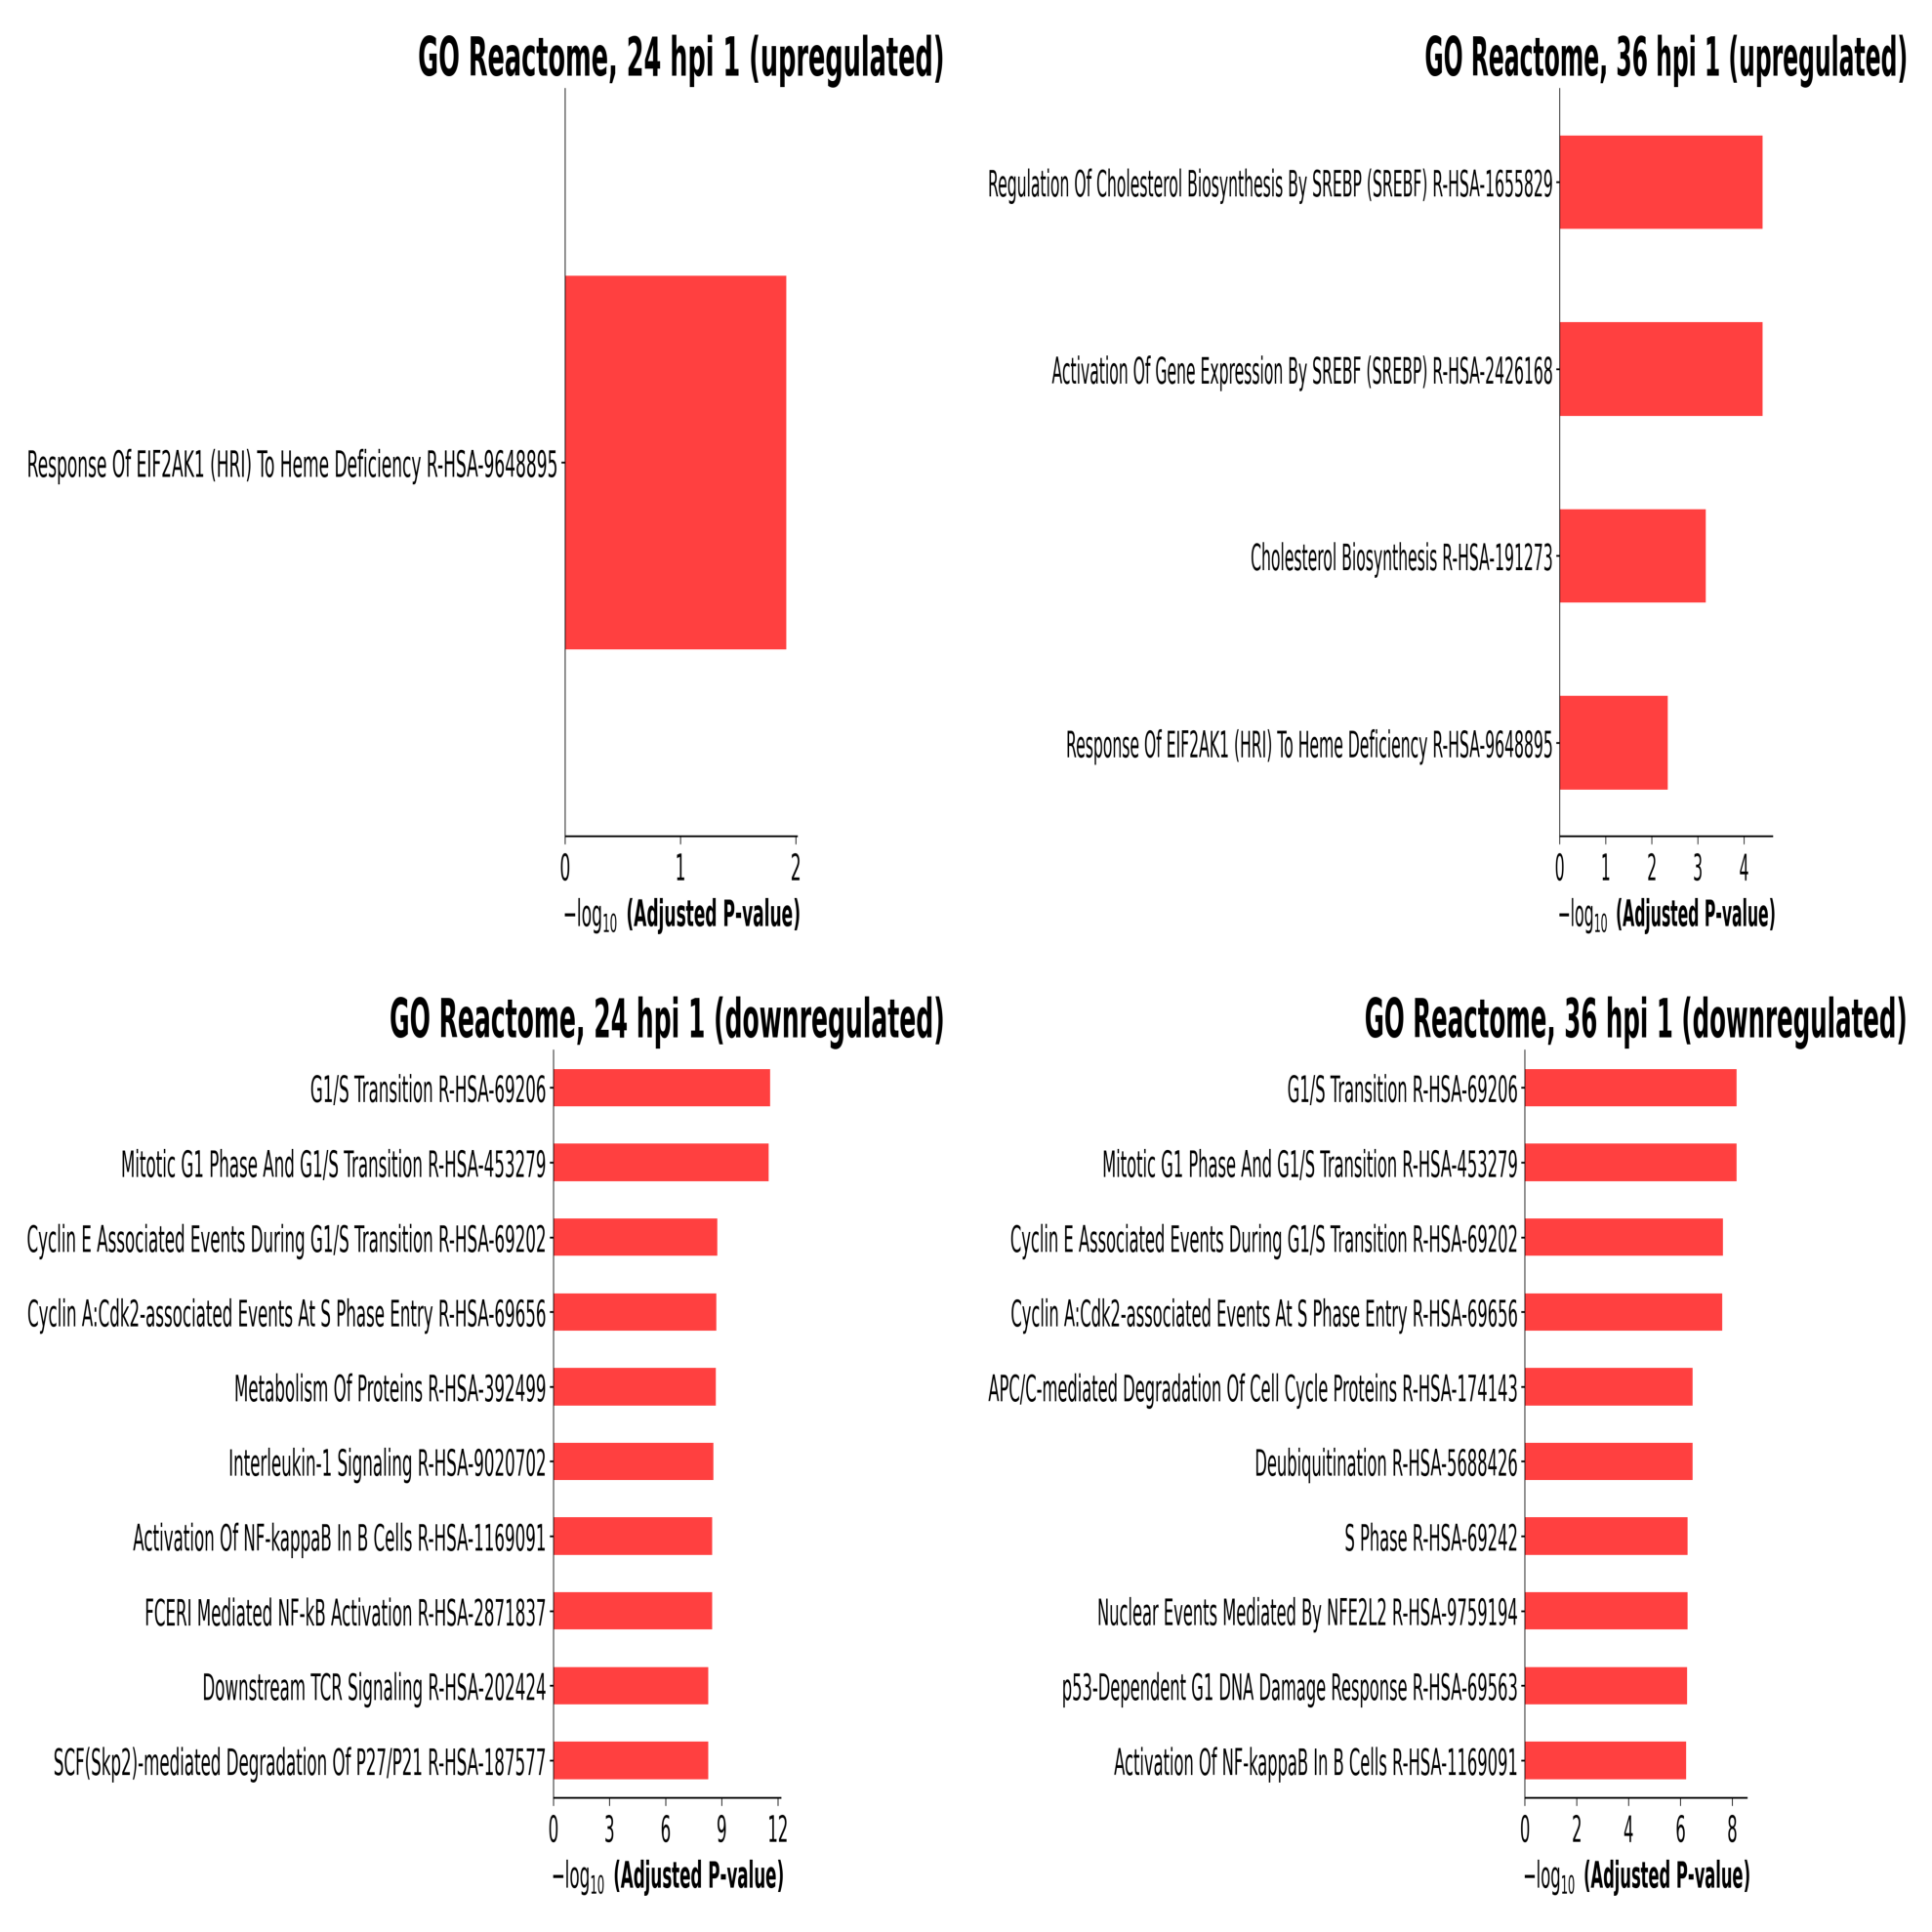

In [29]:
import matplotlib.pyplot as plt
from gseapy.plot import barplot
from io import BytesIO
from PIL import Image

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Save the bar plots as images
buf1 = BytesIO()
buf2 = BytesIO()
buf3 = BytesIO()
buf4 = BytesIO()

barplot(enr_Reactome_down_24.res2d, title='GO Reactome, 24 hpi 1 (upregulated)', color='r', ofname=buf1)
barplot(enr_Reactome_down_36.res2d, title='GO Reactome, 36 hpi 1 (upregulated)', color='r', ofname=buf2)
barplot(enr_Reactome_up_24.res2d, title='GO Reactome, 24 hpi 1 (downregulated)', color='r', ofname=buf3)
barplot(enr_Reactome_up_36.res2d, title='GO Reactome, 36 hpi 1 (downregulated)', color='r', ofname=buf4)

# Load the images
buf1.seek(0)
buf2.seek(0)
buf3.seek(0)
buf4.seek(0)

img1 = Image.open(buf1)
img2 = Image.open(buf2)
img3 = Image.open(buf3)
img4 = Image.open(buf4)

# Display the images on the subplots axes
axs[0, 0].imshow(img1, aspect='auto')
axs[0, 1].imshow(img2, aspect='auto')
axs[1, 0].imshow(img3, aspect='auto')
axs[1, 1].imshow(img4, aspect='auto')

# Remove axes labels
for ax in axs.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()

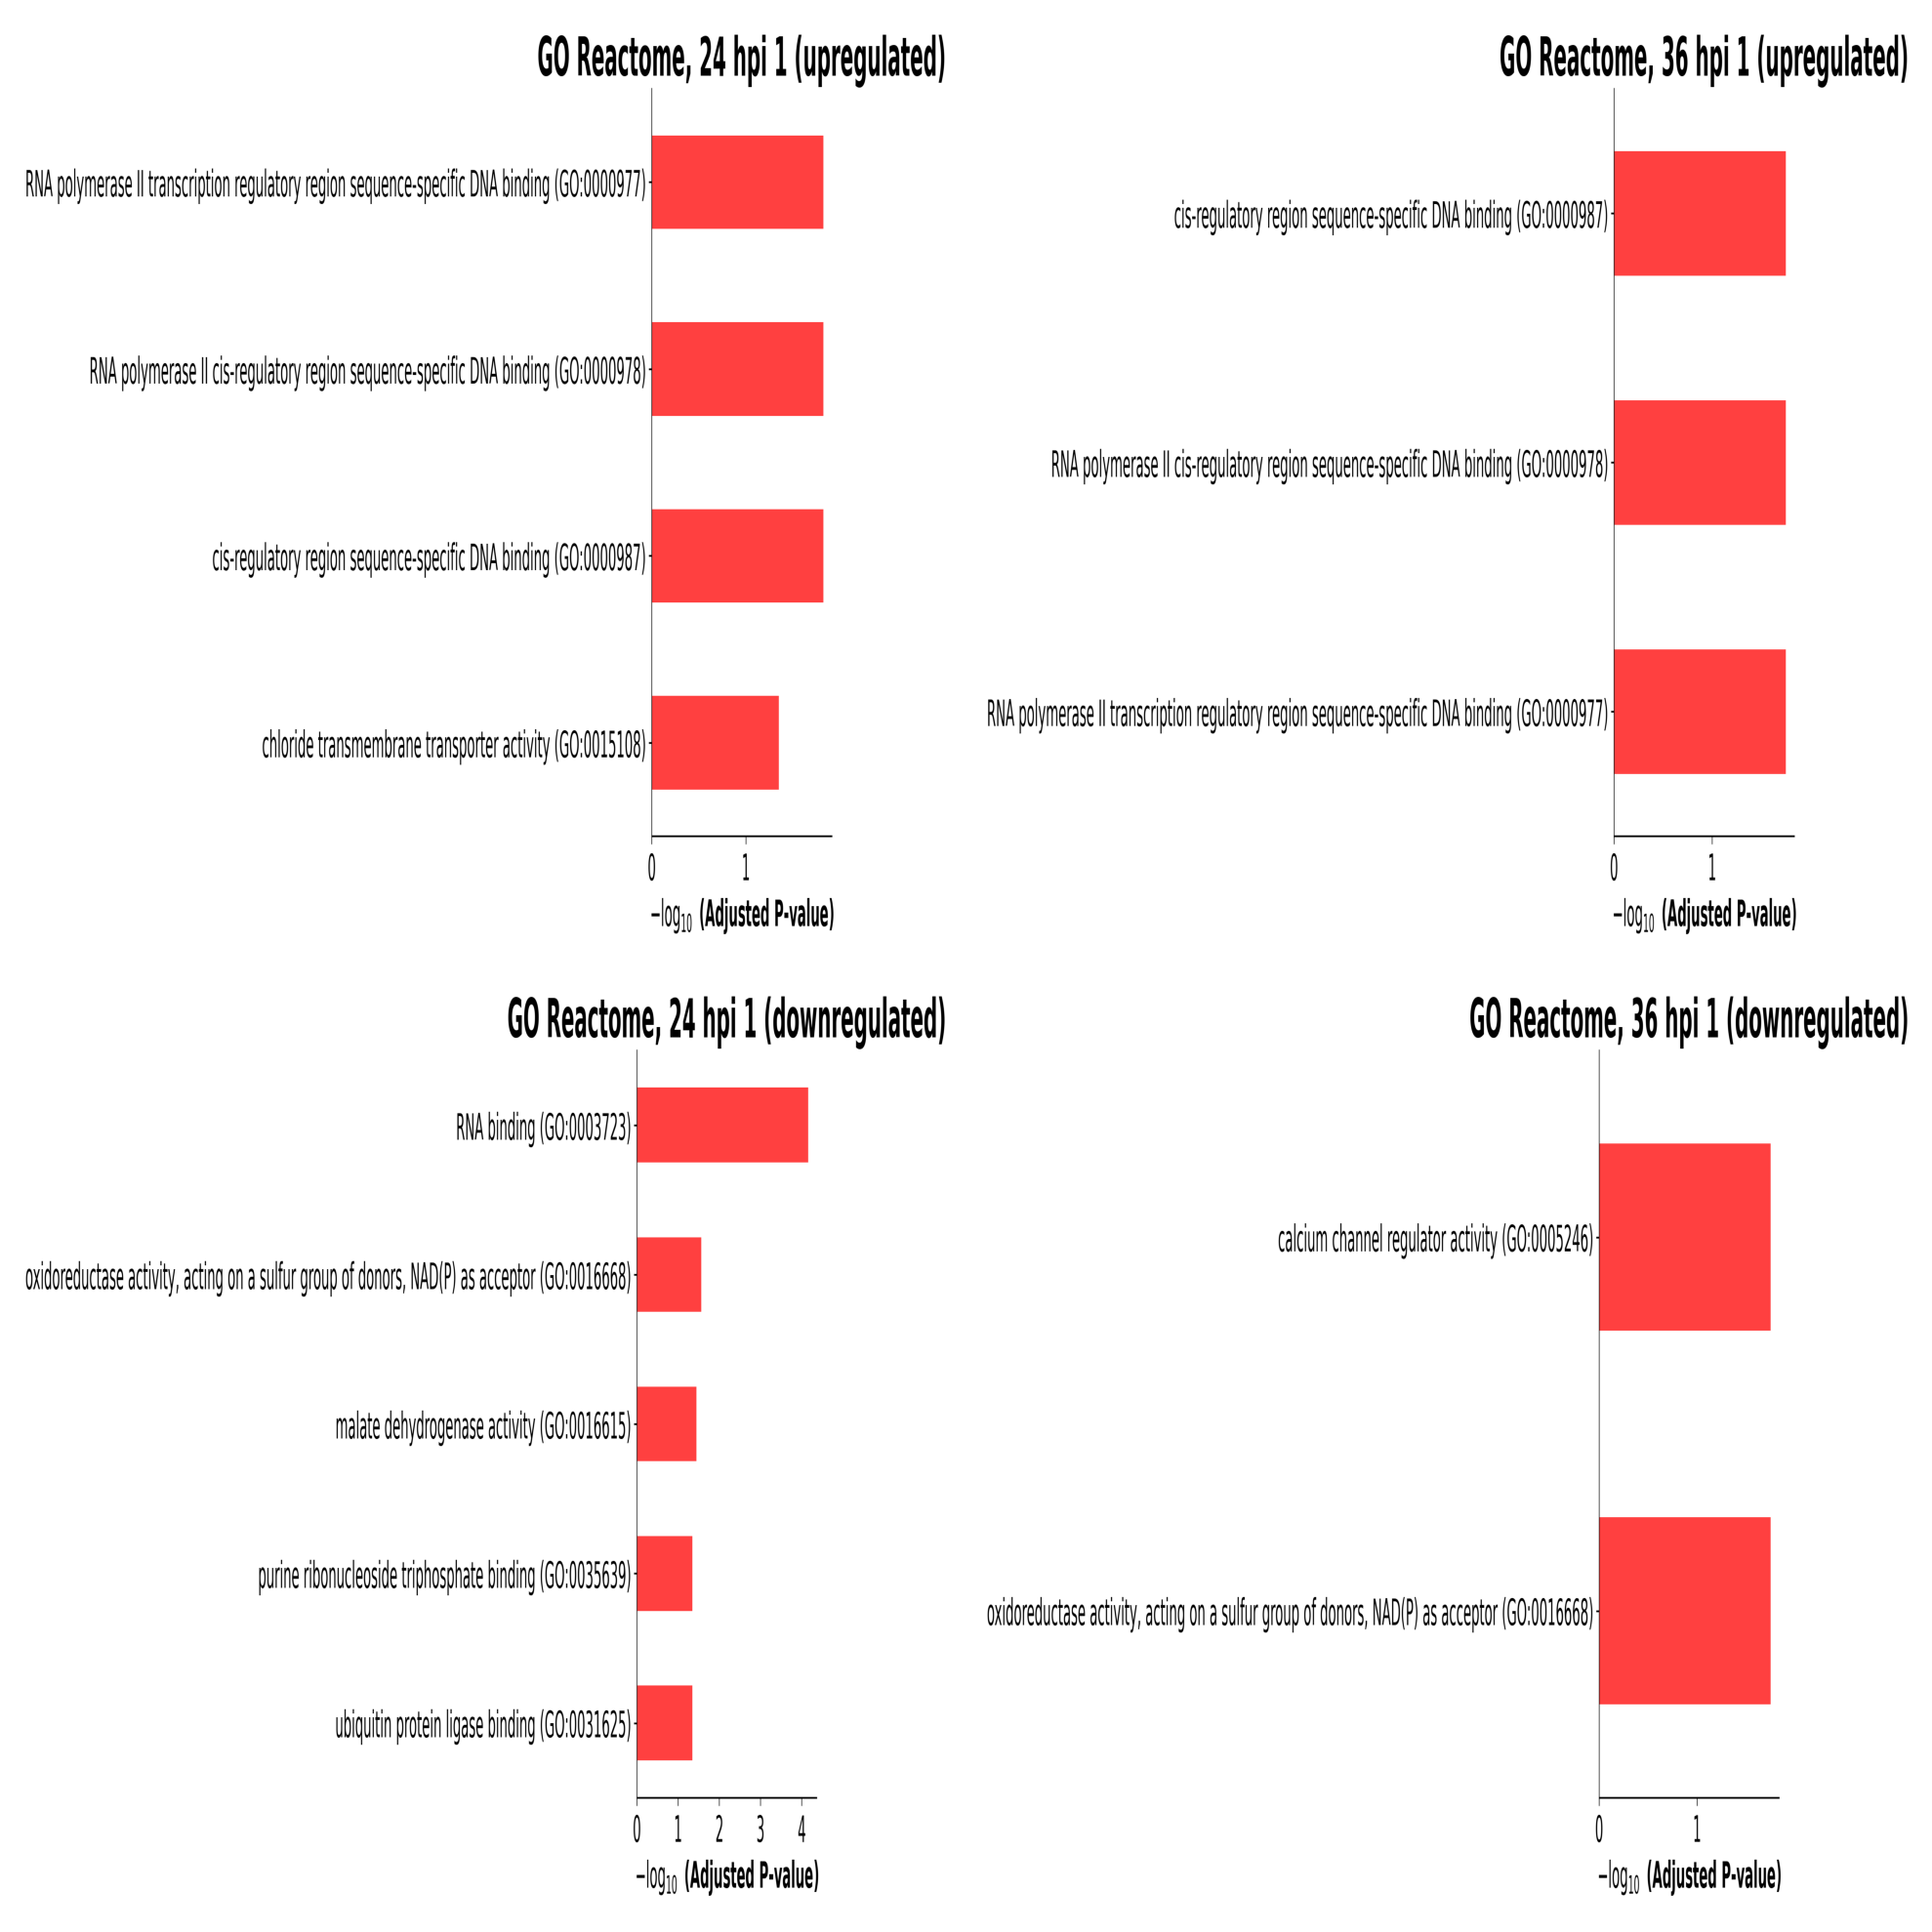

In [30]:
import matplotlib.pyplot as plt
from gseapy.plot import barplot
from io import BytesIO
from PIL import Image

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Save the bar plots as images
buf1 = BytesIO()
buf2 = BytesIO()
buf3 = BytesIO()
buf4 = BytesIO()

barplot(enr_GOMF_down_24.res2d, title='GO Reactome, 24 hpi 1 (upregulated)', color='r', ofname=buf1)
barplot(enr_GOMF_down_36.res2d, title='GO Reactome, 36 hpi 1 (upregulated)', color='r', ofname=buf2)
barplot(enr_GOMF_up_24.res2d, title='GO Reactome, 24 hpi 1 (downregulated)', color='r', ofname=buf3)
barplot(enr_GOMF_up_36.res2d, title='GO Reactome, 36 hpi 1 (downregulated)', color='r', ofname=buf4)

# Load the images
buf1.seek(0)
buf2.seek(0)
buf3.seek(0)
buf4.seek(0)

img1 = Image.open(buf1)
img2 = Image.open(buf2)
img3 = Image.open(buf3)
img4 = Image.open(buf4)

# Display the images on the subplots axes
axs[0, 0].imshow(img1, aspect='auto')
axs[0, 1].imshow(img2, aspect='auto')
axs[1, 0].imshow(img3, aspect='auto')
axs[1, 1].imshow(img4, aspect='auto')

# Remove axes labels
for ax in axs.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()

# The interscection of genes found by different methods

In [31]:
DEGs_up_36.to_csv('pseudo_h1299_DEGs_up_36.csv')
DEGs_down_36.to_csv('pseudo_h1299_DEGs_down_36.csv')

DEGs_up_24.to_csv('pseudo_h1299_DEGs_up_24.csv')
DEGs_down_24.to_csv('pseudo_h1299_DEGs_down_24.csv')

DEGs_up_12.to_csv('pseudo_h1299_DEGs_up_12.csv')
DEGs_down_12.to_csv('pseudo_h1299_DEGs_down_12.csv')

In [32]:
! pwd

/Users/sofialuk/Desktop/thesis/h1299/GSEA_H1299


In [33]:
pd.read_csv('/Users/sofialuk/Desktop/thesis/h1299/GSEA_H1299/pseudo_h1299_DEGs_up_24.csv')

,Unnamed: 0,symbol,Rank
0,0,RRAD,31.948196
1,1,STC1,17.669957
2,2,MAGEA3,9.206047
3,3,BIRC3,9.003125
4,4,PSMC2,8.858261
...,...,...,...
458,459,RAP1GDS1,0.703520
459,460,DNAAF2,0.702557
460,461,SGMS1,0.702519
461,462,GNPDA2,0.690516


In [34]:
pd.read_csv('/Users/sofialuk/Desktop/thesis/h1299/GSEA_H1299/single_h1299_DEGs_up_24.csv')

,Unnamed: 0,symbol,rank
0,0,ANKRD11,inf
1,1,MAMDC4,inf
2,2,SVOP,inf
3,3,TLCD2,inf
4,4,MIOX,inf
...,...,...,...
66,66,ECE1-AS1,0.926734
67,67,MLXIPL,0.882730
68,68,CAPN3,0.797658
69,69,LENG9,0.795956


In [35]:
!pwd

/Users/sofialuk/Desktop/thesis/h1299/GSEA_H1299


In [36]:
import pandas as pd

conditions = ['up', 'down']
methods = ['pseudo', 'single']
hours = [12, 24, 36]

results = []

for hour in hours: 
    for method in methods:
        for condition in conditions:
            filename = f"/Users/sofialuk/Desktop/thesis/h1299/GSEA_H1299/{method}_h1299_DEGs_{condition}_{hour}.csv"
            
            # read in the data
            data = pd.read_csv(filename)
            
            # compute the intersection of the two methods
            if method == 'pseudo':
                other_method = 'single'
                
            else:
                other_method = 'pseudo'
                
            other_filename = f"/Users/sofialuk/Desktop/thesis/h1299/GSEA_H1299/{other_method}_h1299_DEGs_{condition}_{hour}.csv"
            other_data = pd.read_csv(other_filename)

            
            intersection = len(set(data['symbol']) & set(other_data['symbol']))
            
            # add the results to the list
            results.append({
                'Hour': hour,
                'Condition': condition,
                'Method': method,
                'NumGenes': data['symbol'].shape[0],
                'Intersection': intersection
            })

# create a DataFrame from the results and display it
df = pd.DataFrame(results)
print(df)

    Hour Condition  Method  NumGenes  Intersection
0     12        up  pseudo       629             0
1     12      down  pseudo       798             0
2     12        up  single        58             0
3     12      down  single     10863             0
4     24        up  pseudo       463             0
5     24      down  pseudo       484             0
6     24        up  single        71             0
7     24      down  single      7760             0
8     36        up  pseudo       398            77
9     36      down  pseudo       508             7
10    36        up  single      2505            77
11    36      down  single       407             7


In [37]:
enr_Reactome_up_12.res2d['Term'].head(20)

0                   Metabolism Of Proteins R-HSA-392499
1                 Interleukin-1 Signaling R-HSA-9020702
2     Mitotic G1 Phase And G1/S Transition R-HSA-453279
3                              Metabolism R-HSA-1430728
4                                   S Phase R-HSA-69242
5                   Programmed Cell Death R-HSA-5357801
6     Formation Of Senescence-Associated Heterochrom...
7                        Deubiquitination R-HSA-5688426
8                           G1/S Transition R-HSA-69206
9                       Cell Cycle, Mitotic R-HSA-69278
10                               Apoptosis R-HSA-109581
11                                Disease R-HSA-1643685
12           Cellular Responses To Stress R-HSA-2262752
13          Interleukin-1 Family Signaling R-HSA-446652
14    Post-translational Protein Modification R-HSA-...
15          Cellular Responses To Stimuli R-HSA-8953897
16    Citric Acid (TCA) Cycle And Respiratory Electr...
17    Cyclin E Associated Events During G1/S Tra

In [38]:
import pandas as pd

# define the conditions, methods, and hours
conditions = ['up', 'down']
methods = ['pseudo', 'single']
hours = [12, 24, 36]

# initialize an empty list to store the results
results = []

# iterate over the conditions, methods, and hours
for hour in hours: 
    for method in methods:
        for condition in conditions:
            filename = f"/Users/sofialuk/Desktop/thesis/h1299/GSEA_H1299/{method}_h1299_DEGs_{condition}_{hour}.csv"
            
            # read in the data
            data = pd.read_csv(filename)
            
            # compute the intersection of the two methods
            if method == 'pseudo':
                other_method = 'single'
                
            else:
                other_method = 'pseudo'
                
            other_filename = f"/Users/sofialuk/Desktop/thesis/h1299/GSEA_H1299/{other_method}_h1299_DEGs_{condition}_{hour}.csv"
            other_data = pd.read_csv(other_filename)

            
            intersection = len(set(data['symbol']) & set(other_data['symbol']))
            
            # add the results to the list
            results.append({
                'Hour': hour,
                'Condition': condition,
                'Method': method,
                'NumGenes': data['symbol'].shape[0],
                'Intersection': intersection
            })

# create a DataFrame from the results and display it
df = pd.DataFrame(results)
print(df)

    Hour Condition  Method  NumGenes  Intersection
0     12        up  pseudo       629             0
1     12      down  pseudo       798             0
2     12        up  single        58             0
3     12      down  single     10863             0
4     24        up  pseudo       463             0
5     24      down  pseudo       484             0
6     24        up  single        71             0
7     24      down  single      7760             0
8     36        up  pseudo       398            77
9     36      down  pseudo       508             7
10    36        up  single      2505            77
11    36      down  single       407             7


No enriched terms found for GO Reactome, 12 hpi 1 (downregulated). Subplot left blank.


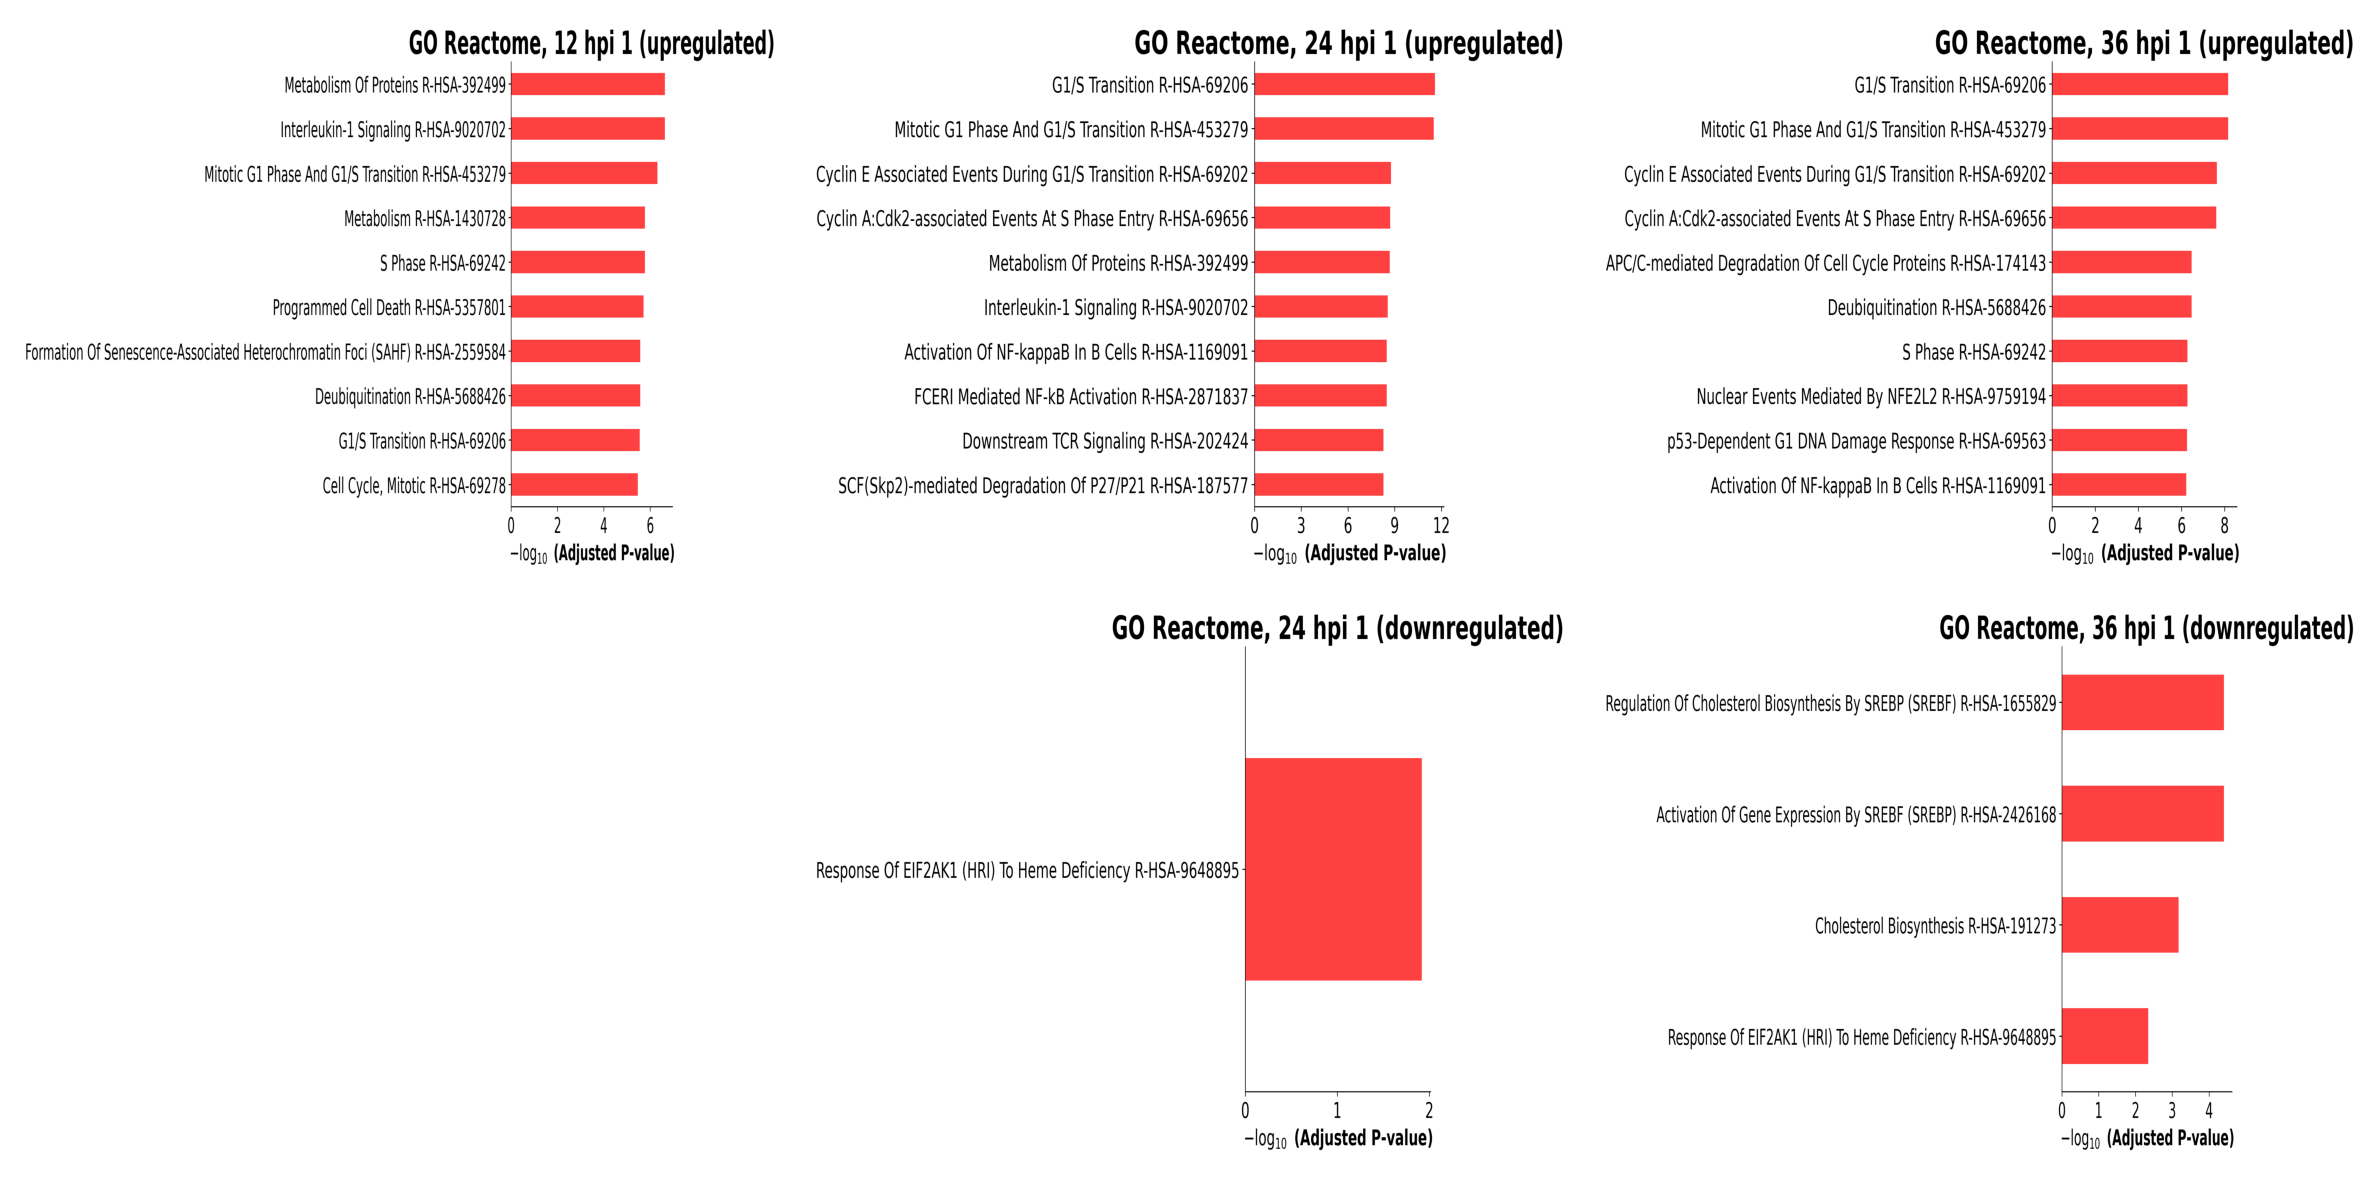

In [53]:
import matplotlib.pyplot as plt
from gseapy.plot import barplot
from io import BytesIO
from PIL import Image

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

# Define a function to handle plotting with error checking
def plot_barplot(enr, title, color, buf):
    try:
        barplot(enr.res2d, title=title, color=color, ofname=buf)
        buf.seek(0)
        img = Image.open(buf)
        axs[i, j].imshow(img, aspect='auto')
        #axs[i, j].set_title(title)
    except ValueError as e:
        if str(e) == 'Warning: No enrich terms when cutoff = 0.05':
            print(f'No enriched terms found for {title}. Subplot left blank.')
        else:
            raise e

# Loop over conditions and timepoints
for i, cond in enumerate(['up', 'down']):
    for j, timepoint in enumerate([12, 24, 36]):
        buf = BytesIO()
        title = f'GO Reactome, {timepoint} hpi 1 ({cond}regulated)'
        enr = globals().get(f'enr_Reactome_{cond}_{timepoint}')
        plot_barplot(enr, title, 'r', buf)

# Remove axes labels
for ax in axs.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()

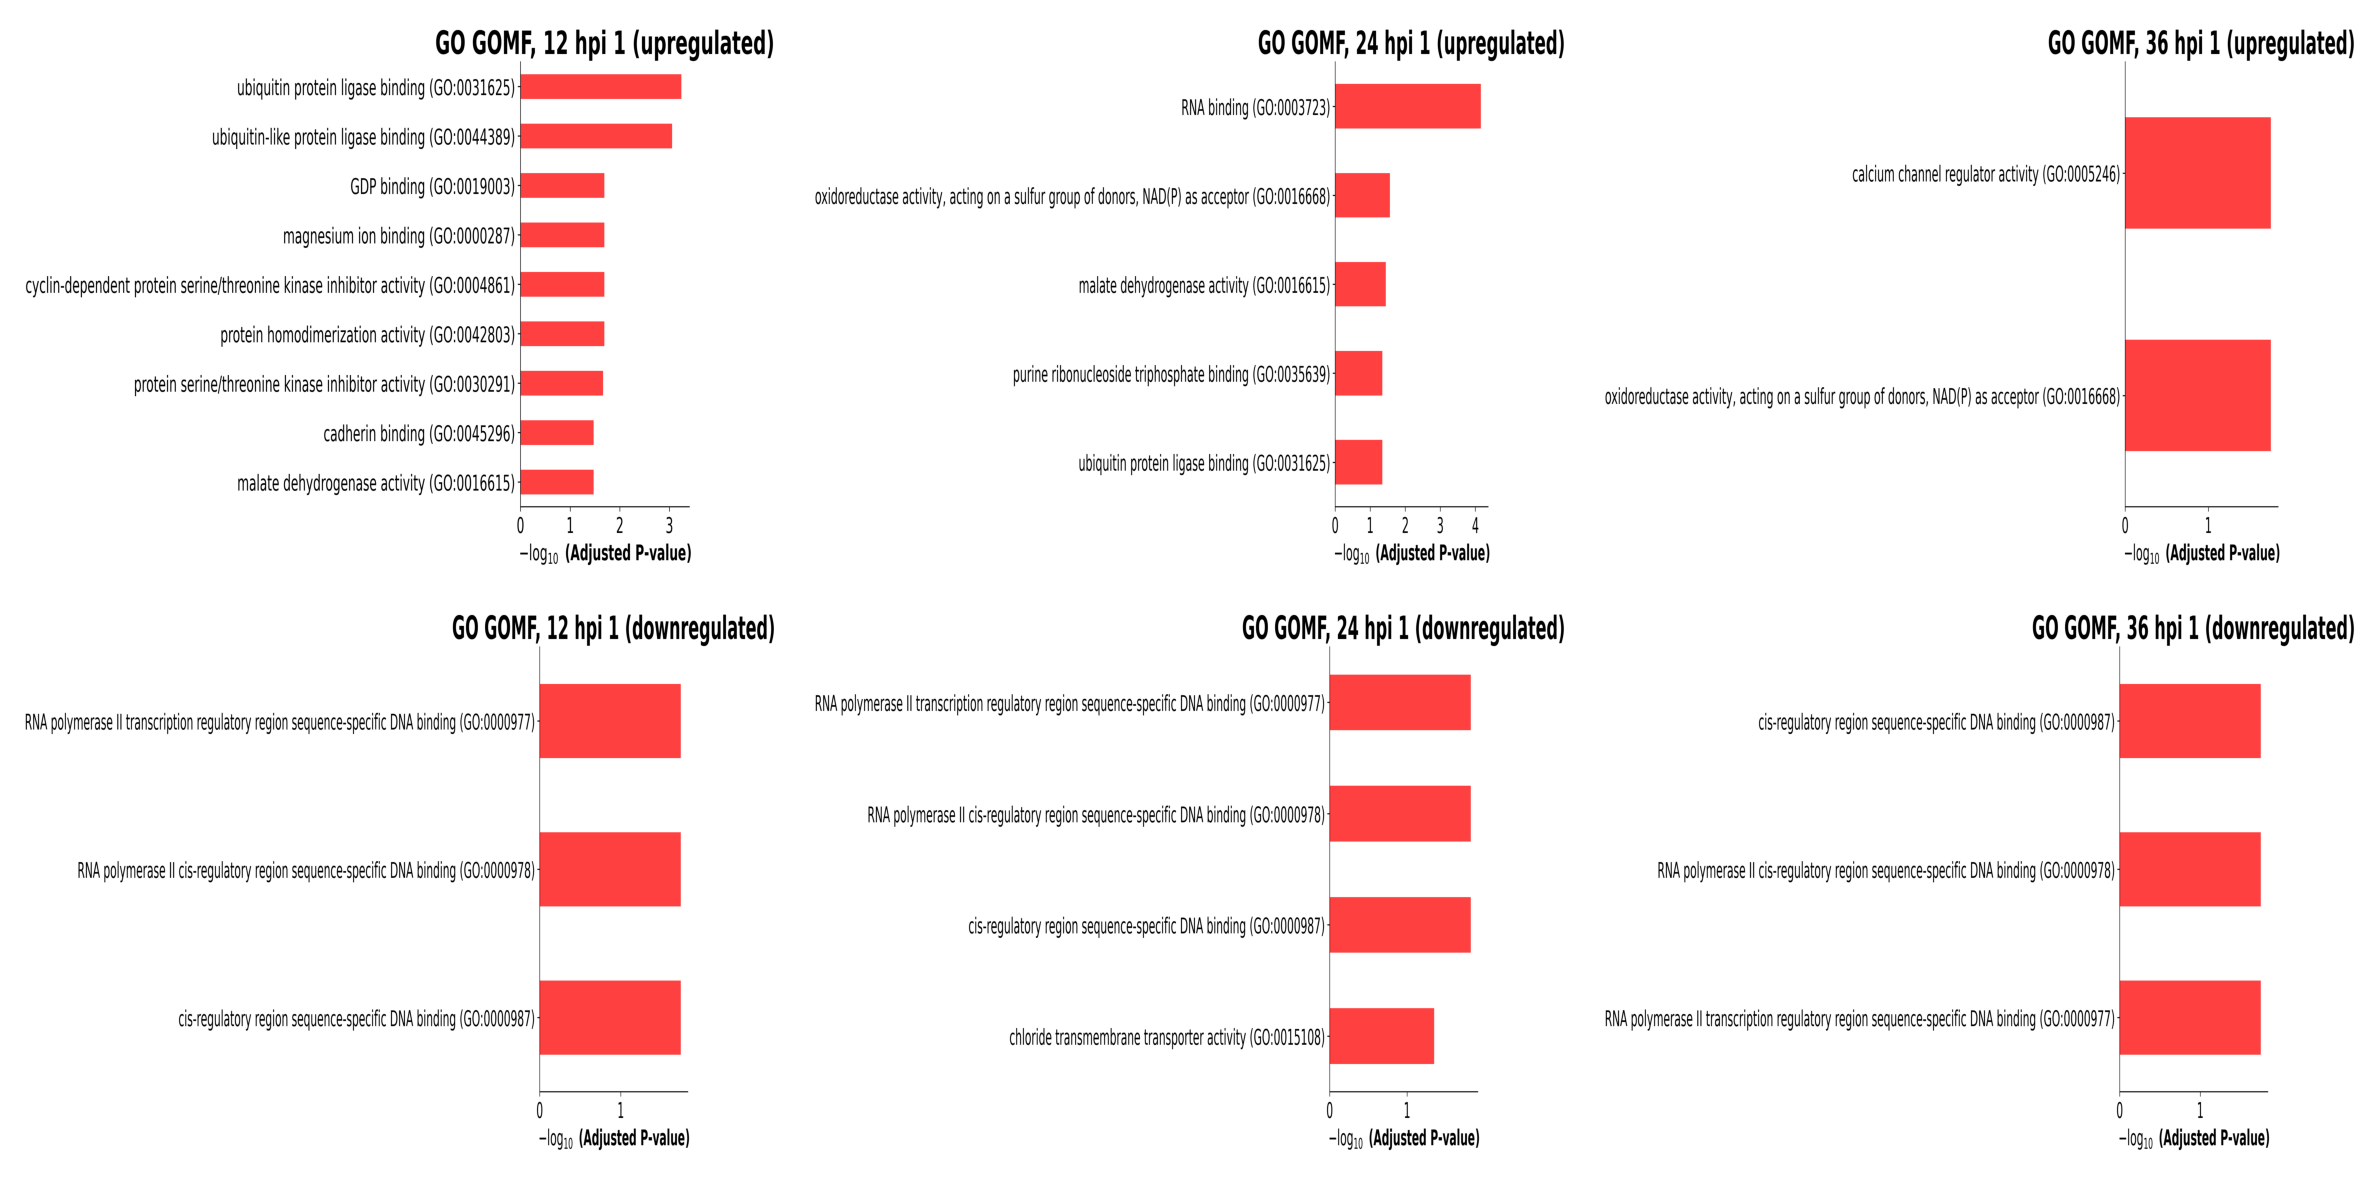

In [55]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

# Loop over conditions and timepoints
for i, cond in enumerate(['up', 'down']):
    for j, timepoint in enumerate([12, 24, 36]):
        buf = BytesIO()
        title = f'GO GOMF, {timepoint} hpi 1 ({cond}regulated)'
        enr = globals().get(f'enr_GOMF_{cond}_{timepoint}')
        plot_barplot(enr, title, 'r', buf)

# Remove axes labels
for ax in axs.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()